# Porter
Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use("seaborn-v0_8-notebook")
%matplotlib inline

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
1. [Data Dictionary](#data)
2. [Univariate Analysis](#univariate)
3. [Bivariate Analysis](#bivariate)
4. [Multivariate Analysis](#multivariate)
5. [Data Preprocessing and Feature Engineering](#feature_eng)
6. [Change cell background colors](#background)

# 1. Data Dictionary <a class='anchor' id='data'></a> [↑](#top)


Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

* market_id : integer id for the market where the restaurant lies
* actual_delivery_time : the timestamp when the order was delivered
* created_at : the timestamp at which the order was placed
* store_primary_category : category for the restaurant
* order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
* total_items subtotal : final price of the order
* num_distinct_items : the number of distinct items in the order
* min_item_price : price of the cheapest item in the order
* max_item_price : price of the costliest item in order
* total_onshift_partners : number of delivery partners on duty at the time order was placed
* total_busy_partners : number of delivery partners attending to other tasks
* total_outstanding_orders : total number of orders to be fulfilled at the moment

In [88]:
porter = pd.read_csv("data/porter.csv", parse_dates=['created_at', 'actual_delivery_time'])
porter.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [89]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

In [90]:
porter.describe()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,197428,197421,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,2015-01-29 02:32:42,2015-01-29 03:22:29,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000
std,1.524867,NaN,NaN,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830


In [91]:
porter.describe(include='object')

,store_id,store_primary_category
count,197428,192668
unique,6743,74
top,d43ab110ab2489d6b9b2caa394bf920f,american
freq,937,19399


In [92]:
porter[porter.columns[porter.isnull().any()]].isnull().sum()

market_id                     987
actual_delivery_time            7
store_primary_category       4760
order_protocol                995
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [93]:
porter.dropna().shape

(176248, 14)

In [94]:
porter.nunique(dropna=True)

market_id                        6
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          74
order_protocol                   7
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         172
total_busy_partners            159
total_outstanding_orders       281
dtype: int64

In [95]:
porter.dropna(inplace=True)

In [96]:
porter.shape

(176248, 14)

# 2. Univariate Analysis <a class='anchor' id='univariate' ></a> [↑](#top)

In [97]:
df = porter.copy()

In [98]:
timestamp_cols = df.select_dtypes(include='datetime').columns
cat_cols = ['store_primary_category', 'order_protocol', 'total_items', 'num_distinct_items']
num_cols = ['subtotal', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
obj_cols = df.select_dtypes(include='object').columns

In [99]:
df = (porter
          .assign(
              est_delivery_time =(porter.actual_delivery_time - porter.created_at).astype('int64')/ (10**9),
              created_at_day=porter.created_at.dt.day,
              created_at_weekday=porter.created_at.dt.weekday,
              created_at_hour = porter.created_at.dt.hour,
              )
)

In [100]:
# functions to annotate bars in bar chart

def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for
             p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - .1
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), fontsize=10, color='black')

# example : with_hue(ax,g1.Content_Type,2,2)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

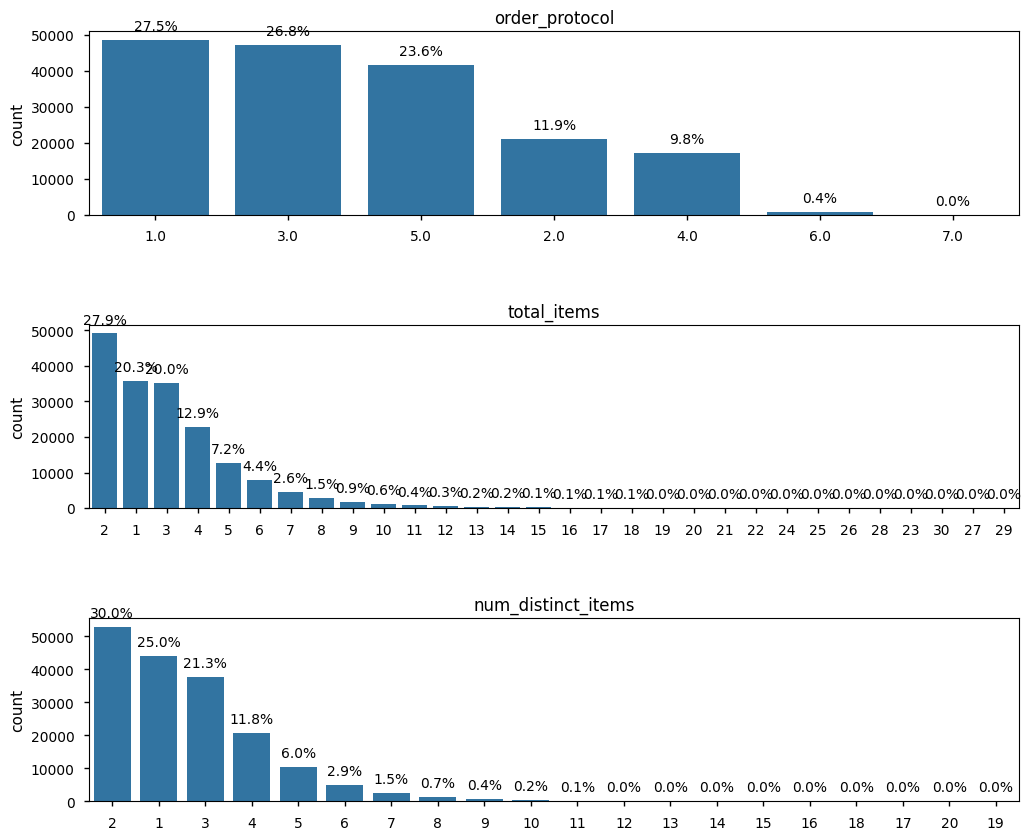

In [101]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.countplot(x=df[column], ax=ax, order = df[column].value_counts().head(30).index)
    ax.set_title(column)
    ax.set_xlabel('')
    without_hue(ax, df[column])

plt.show()

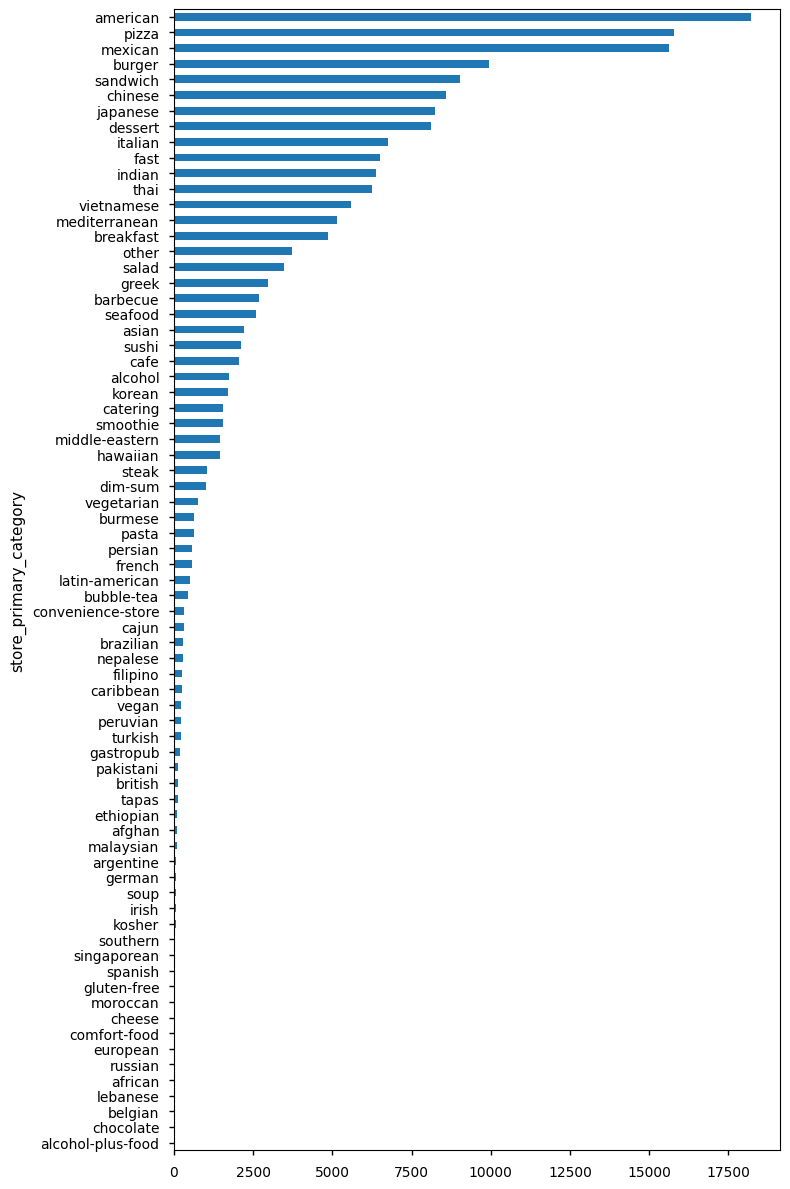

In [102]:
plt.figure(figsize=(8,12))
ax = df.store_primary_category.value_counts().plot(kind='barh')
ax.invert_yaxis()  # Invert the y-axis
# plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
# plt.subplots_adjust(bottom=0.6)  # Adjust the bottom margin to make room for rotated labels
plt.tight_layout()
plt.show()

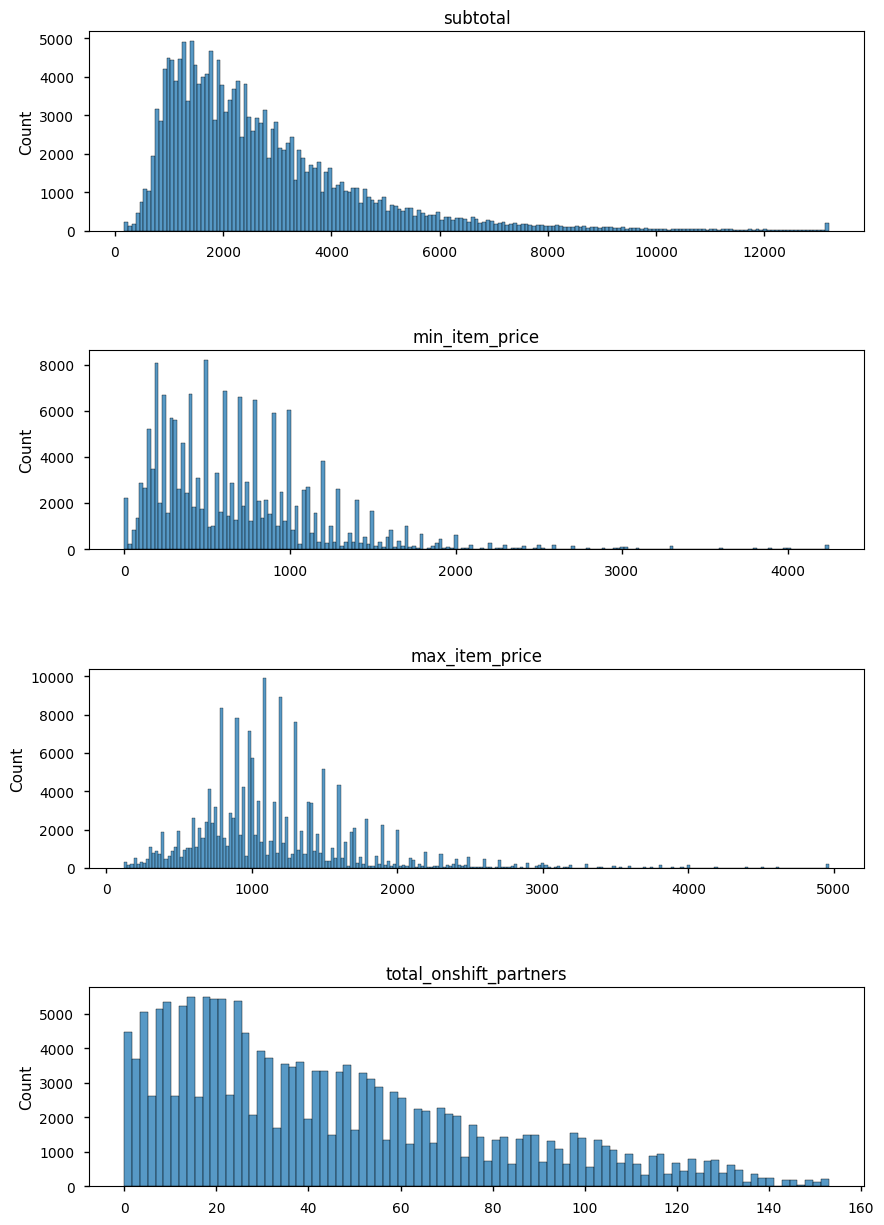

In [103]:
from scipy.stats.mstats import winsorize

fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10,15))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[num_cols], axs.ravel()):
    sns.histplot(x=winsorize(df[column], limits=[0.001, 0.001]).data, ax=ax)
    # winsorize does capping or truncating extreme values beyond a certain percentile.
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

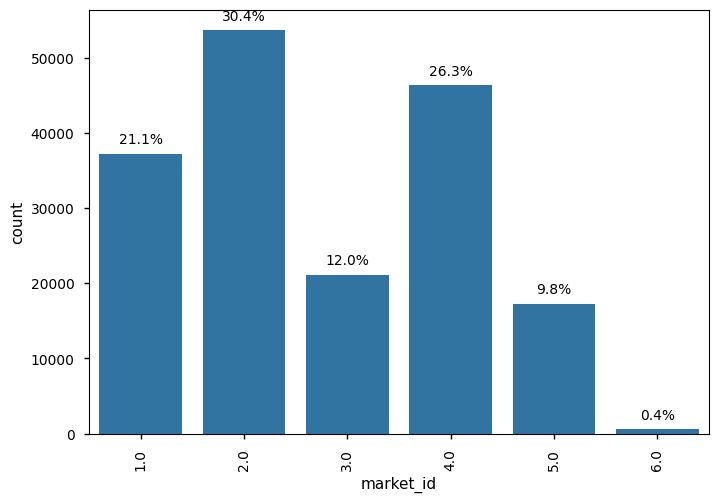

In [104]:
ax = sns.countplot(data=df,x="market_id")
plt.xticks(rotation='vertical')
without_hue(ax,df.market_id)

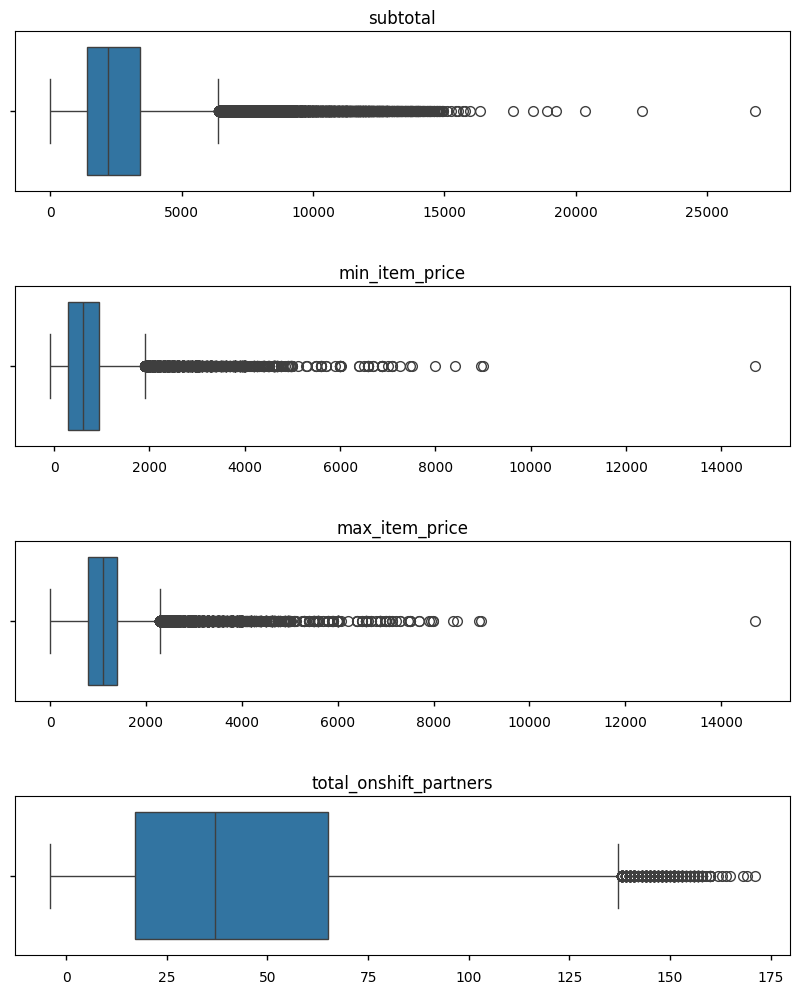

In [105]:
from scipy.stats.mstats import winsorize

fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10,12))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[num_cols], axs.ravel()):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

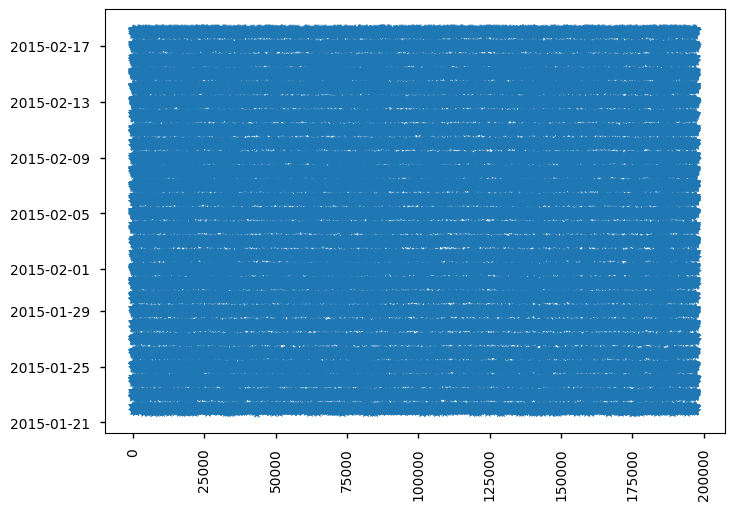

In [106]:
temp = df.created_at.sort_values(ascending=True)
plt.plot(temp.index, temp.values, '*')
plt.xticks(rotation='vertical')
plt.show()

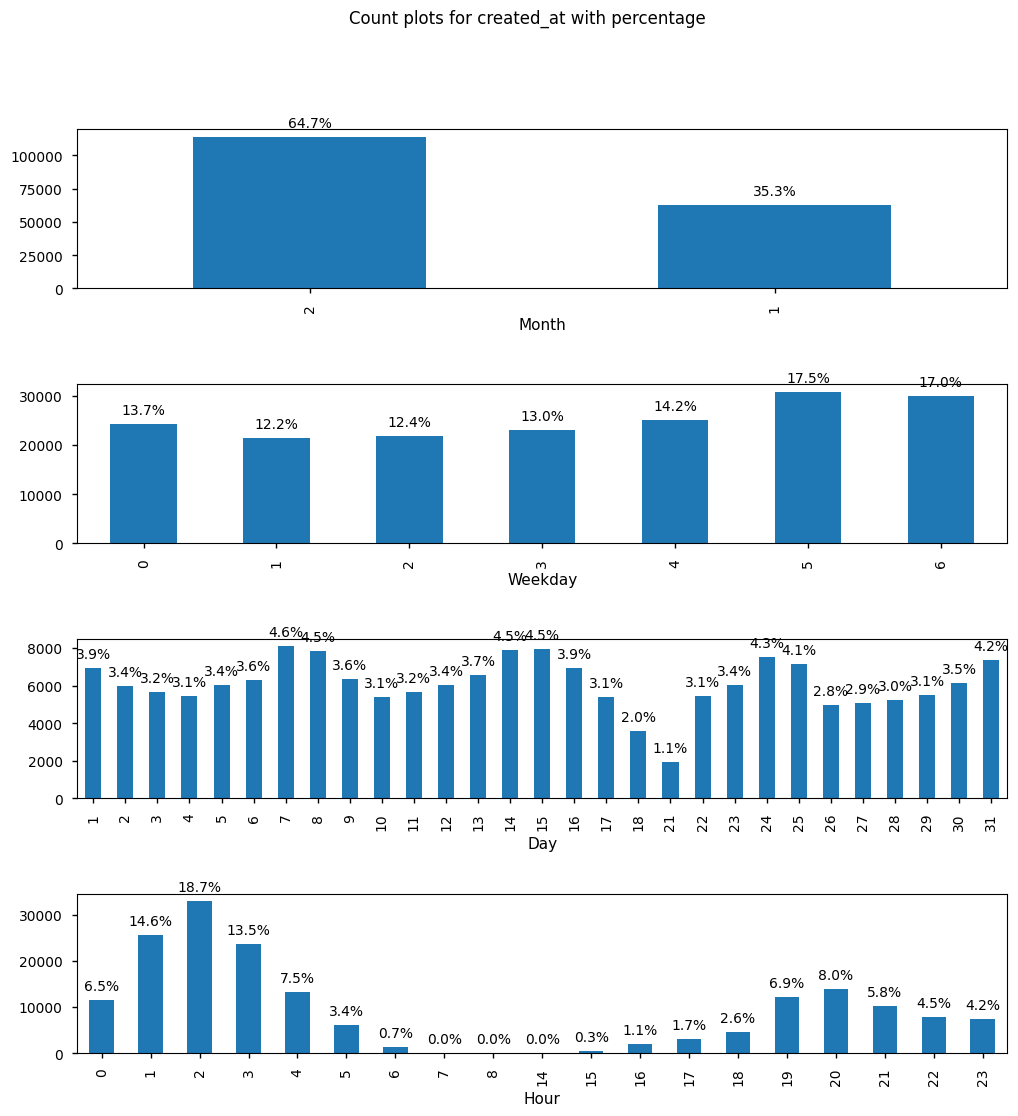

In [107]:
fig, axs = plt.subplots(4,1, figsize=(12,12))
plt.subplots_adjust(hspace=0.6)

plt.suptitle('Count plots for created_at with percentage')
axs = axs.ravel()
i = 0
for column in ['created_at']:
    ax=df[column].dropna().dt.month.value_counts().plot(kind='bar', ax=axs[i])
    ax.set_xlabel('Month')
    without_hue(ax, df[column])
    ax=df[column].dropna().dt.weekday.value_counts().sort_index().plot(kind='bar', ax=axs[i+1])
    ax.set_xlabel('Weekday')
    without_hue(ax, df[column])
    ax = df[column].dropna().dt.day.value_counts().sort_index().plot(kind='bar', ax = axs[i+2])
    ax.set_xlabel('Day')
    without_hue(ax, df[column])
    ax = df[column].dropna().dt.hour.value_counts().sort_index().plot(kind='bar', ax = axs[i+3])
    ax.set_xlabel('Hour')
    without_hue(ax, df[column])
    i = 1


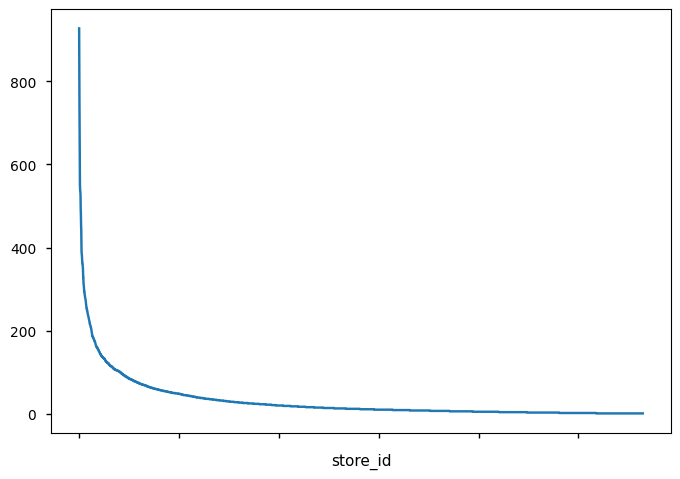

In [108]:
ax = df.store_id.value_counts().plot()
ax.set_xticklabels('')
plt.show()

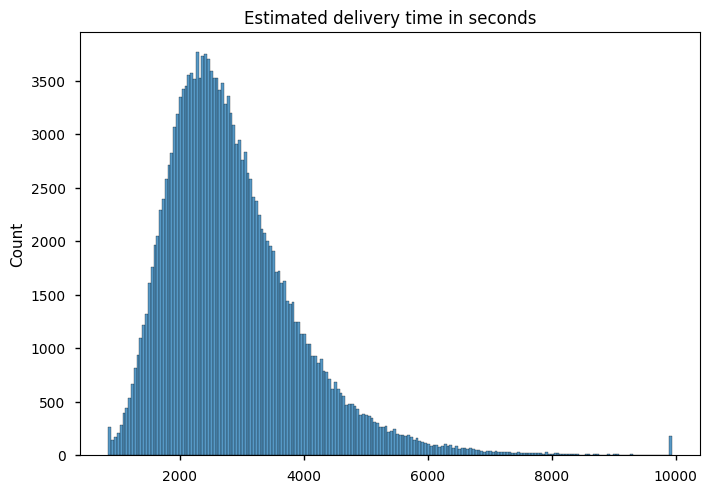

In [109]:
temp = df.dropna()
est_delivery_time = (
        (temp.actual_delivery_time - temp.created_at)
        .astype('int64')/ (10**9)
    )

sns.histplot(winsorize(est_delivery_time, limits=[0.001, 0.001]).data)
plt.title('Estimated delivery time in seconds')
plt.show()

# 3. Bivariate Analysis <a class='anchor' id='bivariate'></a> [↑](#top)

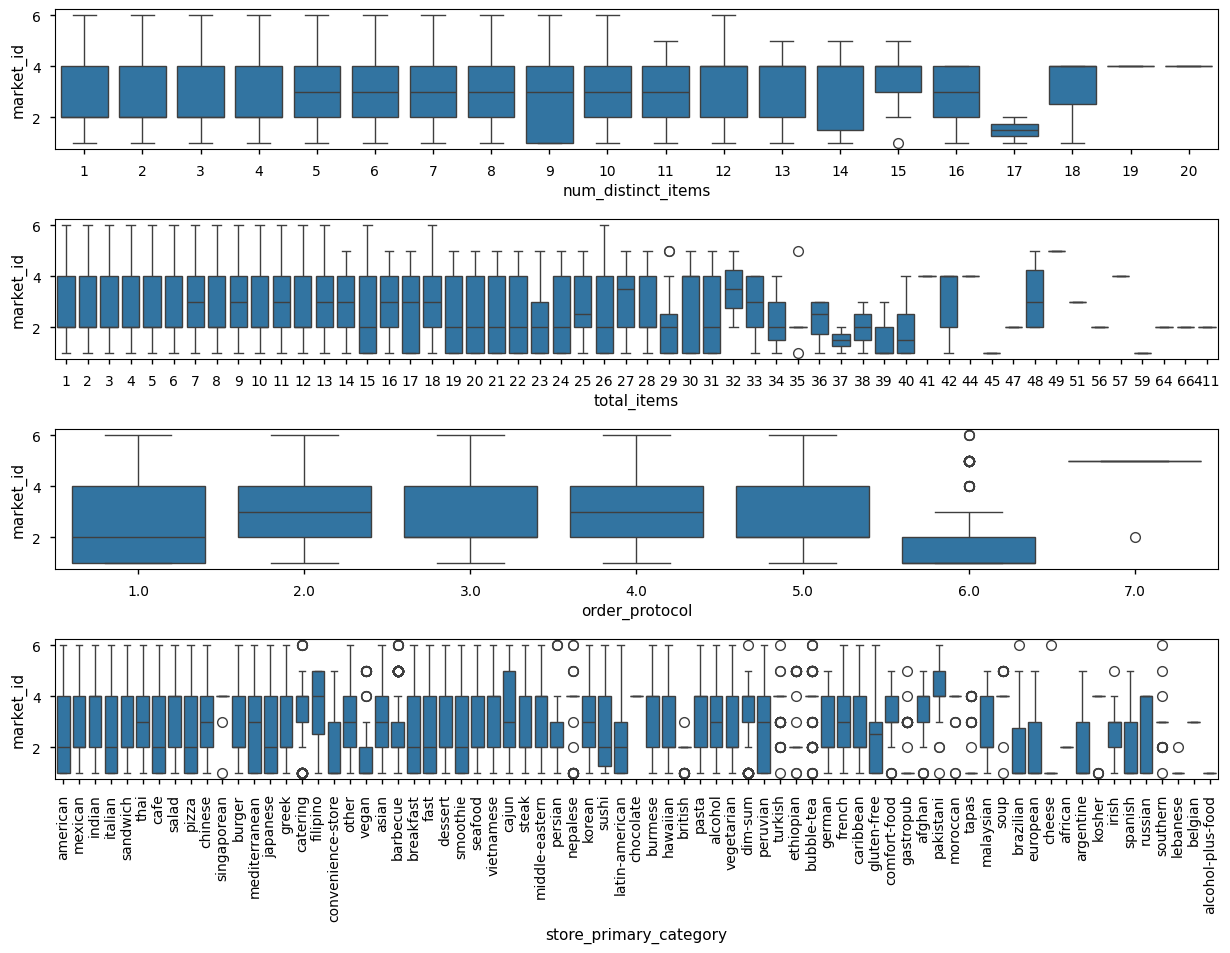

In [110]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(cat_cols[::-1], axs.ravel()):
    sns.boxplot(df, x=col, y='market_id', ax=ax)
    plt.xticks(rotation='vertical')
plt.show()

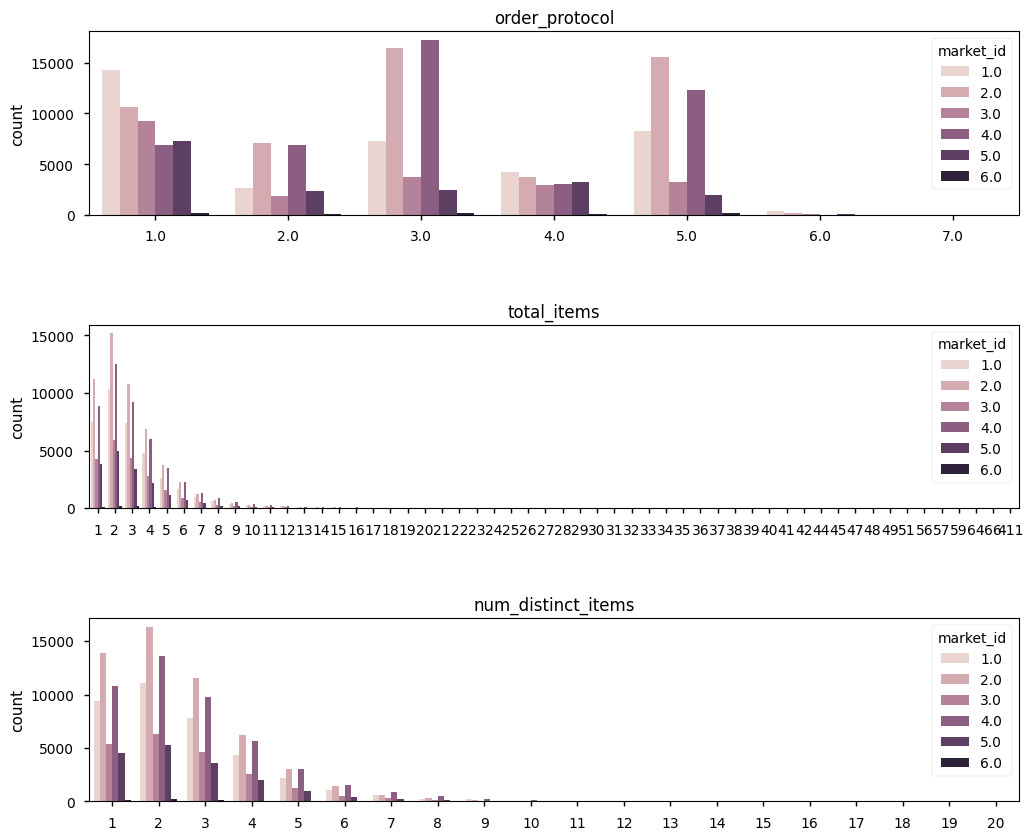

In [111]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.countplot(x=df[column], ax=ax, hue=df.market_id)
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

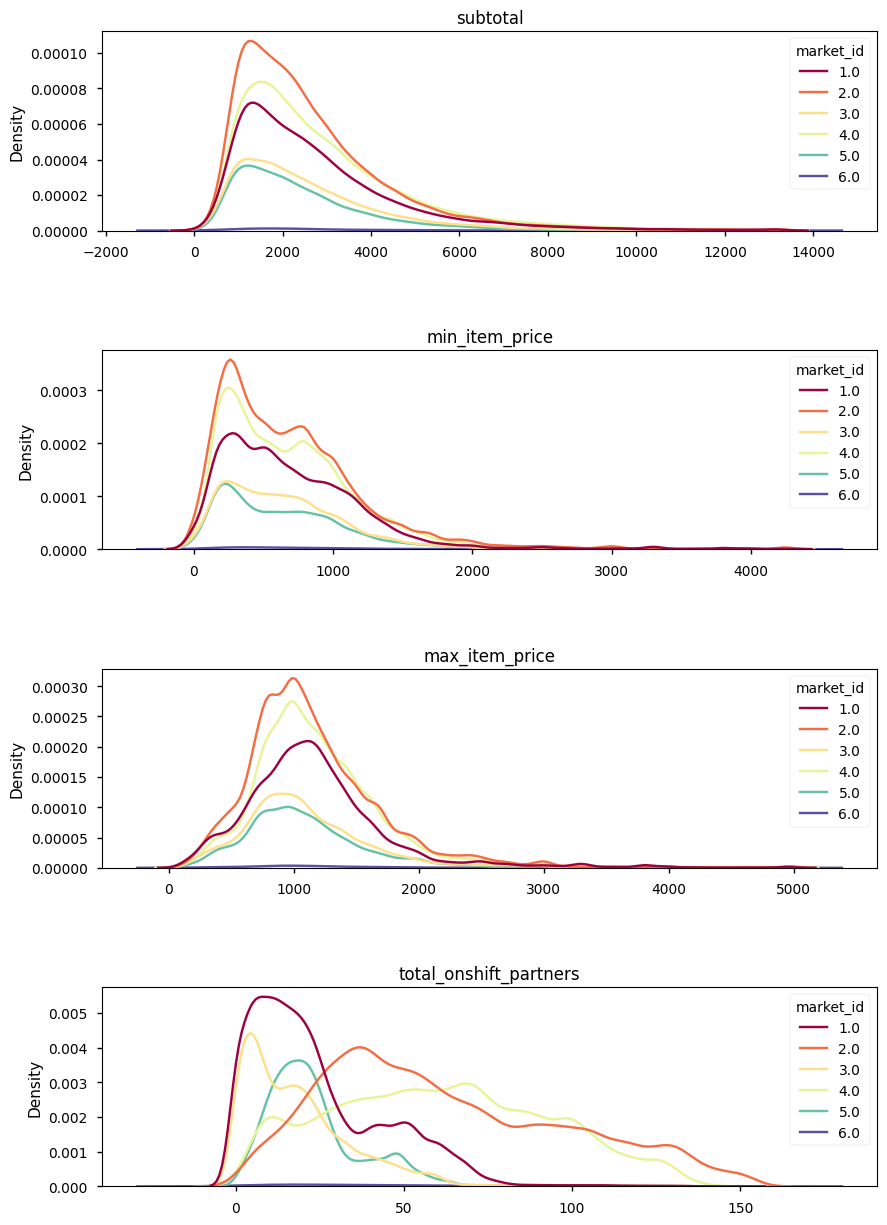

In [112]:
fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10,15))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[num_cols], axs.ravel()):
    sns.kdeplot(x=winsorize(df[column], limits=[0.001, 0.001]).data, ax=ax, hue=df.market_id, 
                palette = sns.color_palette("Spectral", as_cmap=True))
    # winsorize does capping or truncating extreme values beyond a certain percentile.
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

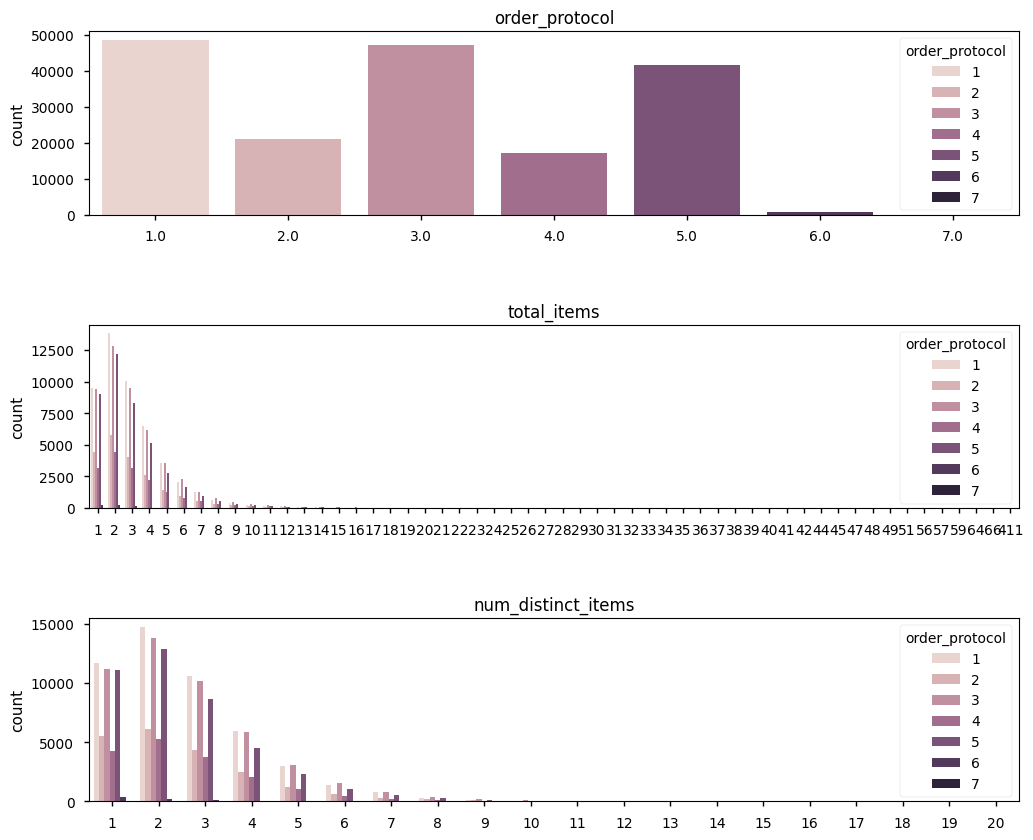

In [113]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.countplot(x=df[column], ax=ax, hue=df.order_protocol)
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

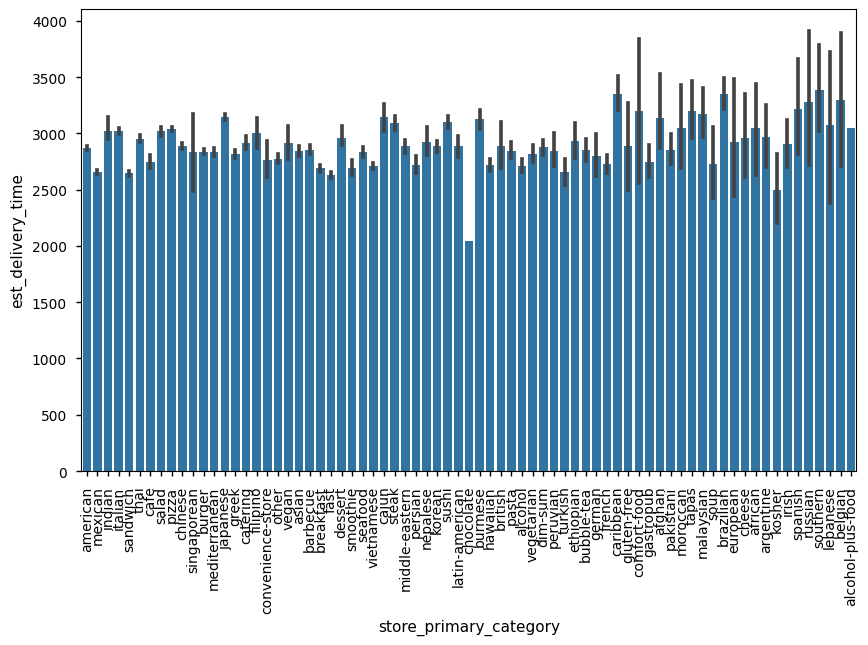

In [114]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.store_primary_category, y=est_delivery_time)
plt.ylabel('est_delivery_time')
plt.xticks(rotation='vertical')
plt.show()

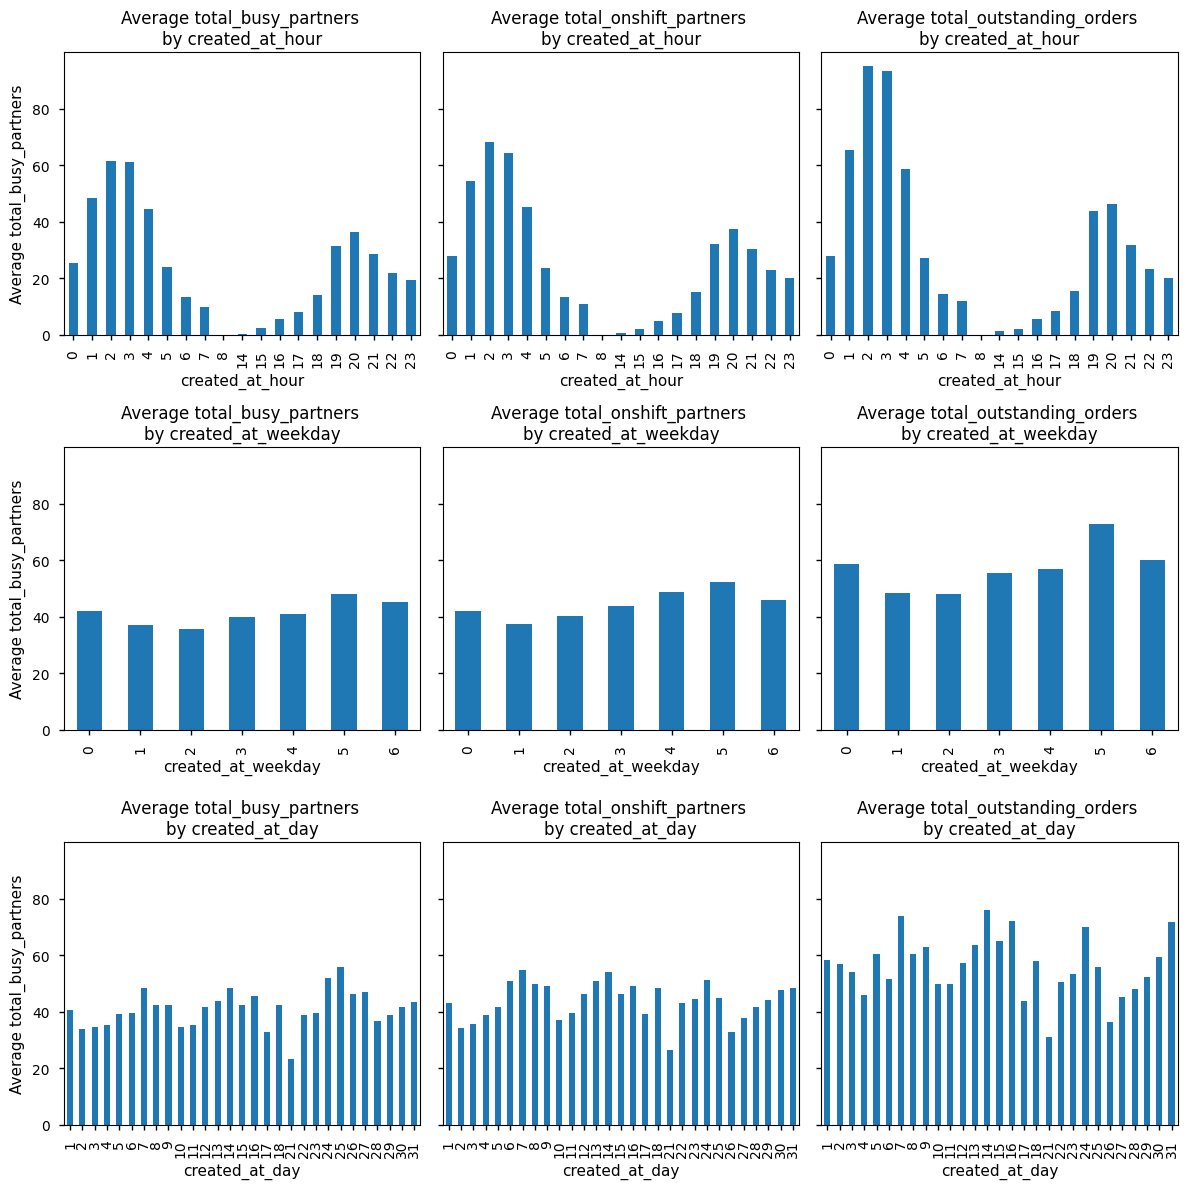

In [115]:
fig, axs = plt.subplots(3,3, figsize=(12,12), sharey=True)

axs = axs.ravel()
i = 0
for grpcol in ['created_at_hour', 'created_at_weekday', 'created_at_day']:
    for col in ['total_busy_partners', 'total_onshift_partners', 'total_outstanding_orders']:
        ax = df.groupby(grpcol)[col].mean().plot(kind='bar', ax = axs[i])
        i += 1
        ax.set_title(f'Average {col} \nby {grpcol}')
        ax.set_xlabel(f'{grpcol}')
        ax.set_ylabel(f'Average {col}')

plt.tight_layout()
plt.show()

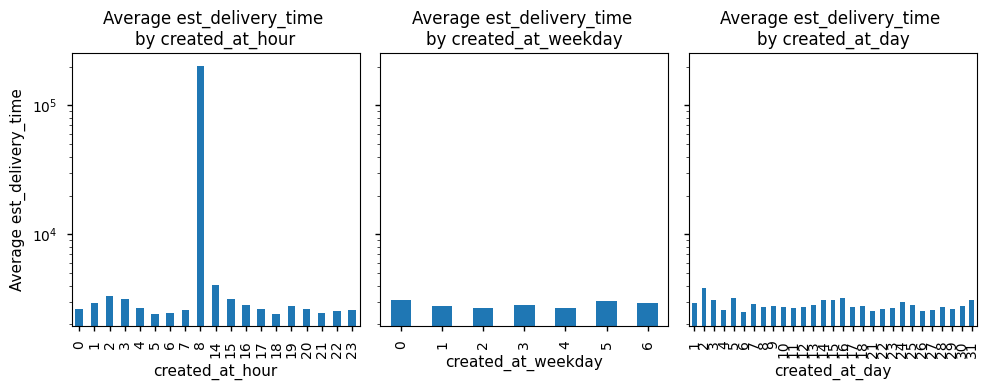

In [116]:
fig, axs = plt.subplots(1,3, figsize=(10,4), sharey=True)

axs = axs.ravel()
i = 0
for grpcol in ['created_at_hour', 'created_at_weekday', 'created_at_day']:
    for col in ['est_delivery_time']:
        ax = df.groupby(grpcol)[col].mean().plot(kind='bar', ax = axs[i])
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        i += 1
        ax.set_title(f'Average {col} \nby {grpcol}')
        ax.set_xlabel(f'{grpcol}')
        ax.set_ylabel(f'Average {col}')

plt.tight_layout()
plt.show()

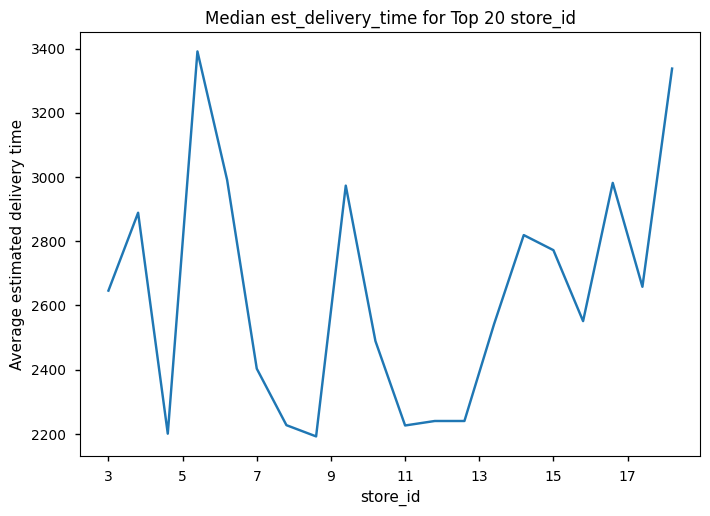

In [133]:
ax = df.groupby('store_id')['est_delivery_time'].median()[df.store_id.value_counts().head(20)].plot()
ax.set_xticklabels(list(range(1, 21, 2)))
ax.set_title('Median est_delivery_time for Top 20 store_id')
ax.set_ylabel('Average estimated delivery time')
plt.show()

# 4. Multivariate Analysis <a class='anchor' id='multivariate'></a> [↑](#top)

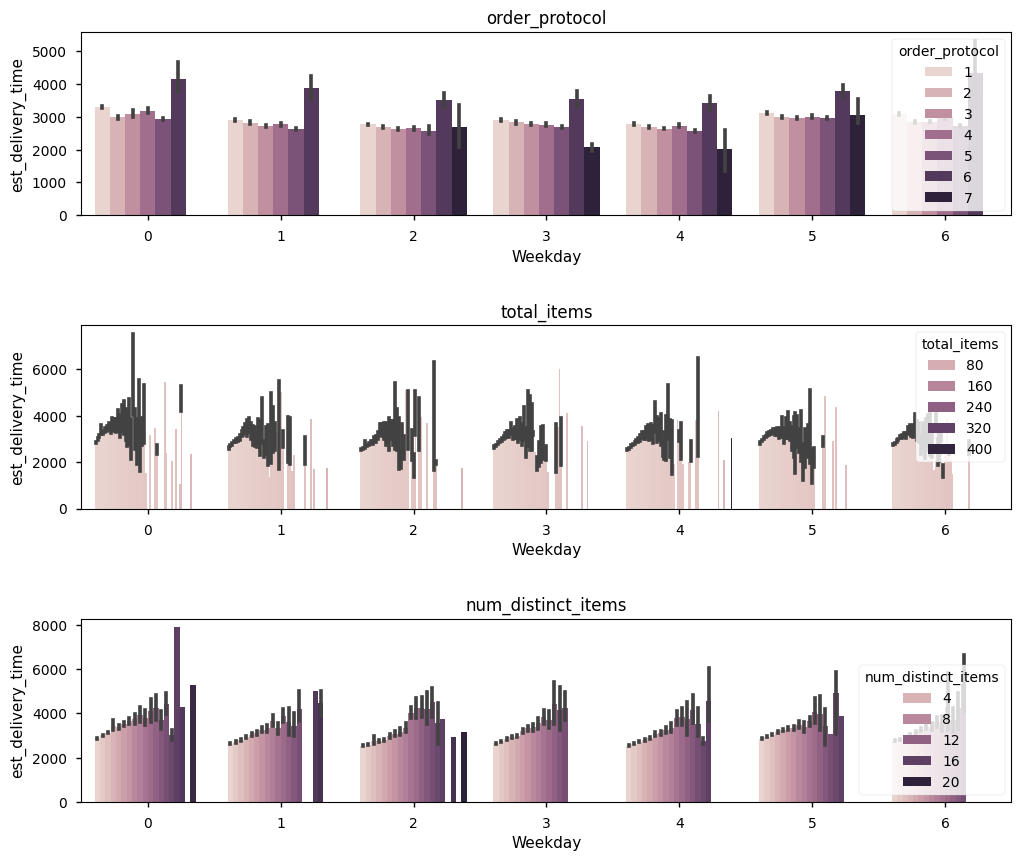

In [29]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.barplot(x=df.created_at.dt.weekday, y=est_delivery_time, ax=ax, hue=df[column])
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_xlabel('Weekday')
    ax.set_ylabel('est_delivery_time')
plt.show()

In [147]:
delivery_count.values
col

['b',
 'g',
 'g',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b']

created_at_hour
8     32690.000000
7      2601.222222
14     4052.205128
15     3123.984127
6      2458.112837
16     2838.332134
17     2648.694236
18     2429.993621
5      2429.197072
23     2601.384710
22     2519.846769
21     2453.608234
0      2644.171987
19     2761.762404
4      2686.845028
20     2653.575924
3      3152.200051
1      2941.610282
2      3299.113482
Name: est_delivery_time, dtype: float64

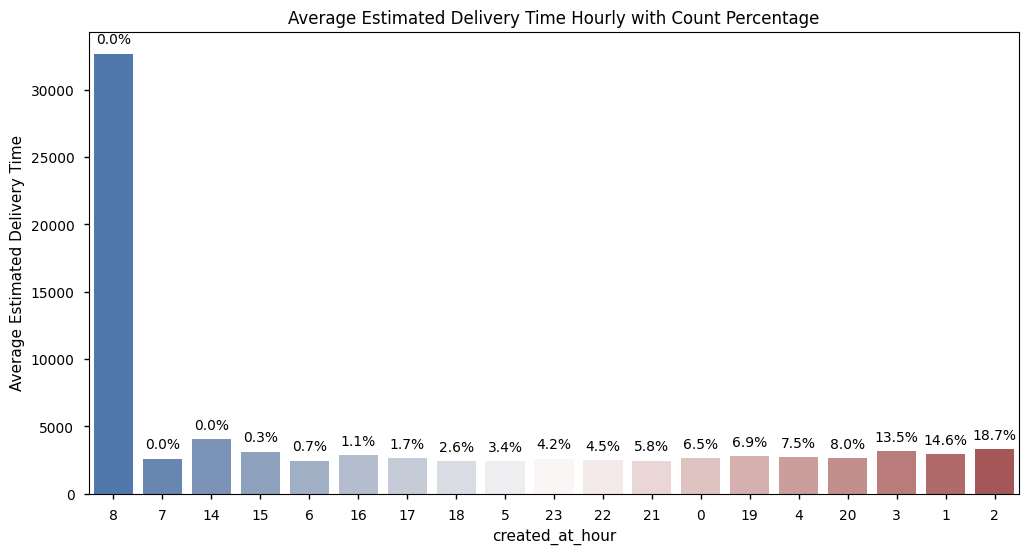

In [167]:
temp = pd.DataFrame({'created_at_hour':df.created_at.dt.hour, 'est_delivery_time':est_delivery_time})
temp = temp[temp.est_delivery_time < 60000].dropna()
temp1 = temp.groupby('created_at_hour')['est_delivery_time'].mean()

plt.figure(figsize=(12,6))
# Count of deliveries for each hour
delivery_count = temp['created_at_hour'].value_counts().sort_index()
delivery_count = delivery_count*100/sum(delivery_count)
delivery_count = delivery_count.sort_values()
ax = sns.barplot(x=temp1.index, y=temp1.values, palette='vlag', order=temp1[delivery_count.sort_values().index].index)

# Annotate bars with custom values
for i, p in enumerate(ax.patches):
    ax.annotate(f'{delivery_count.iloc[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_ylabel('Average Estimated Delivery Time')
plt.title('Average Estimated Delivery Time Hourly with Count Percentage')
plt.show()

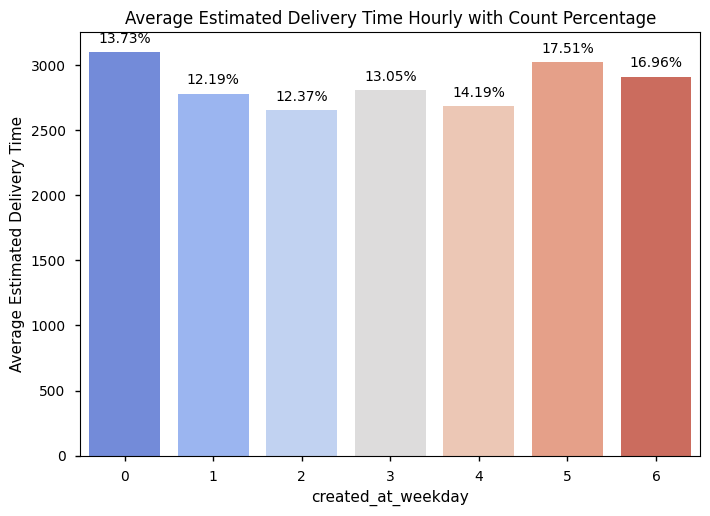

In [31]:
temp = pd.DataFrame({'created_at_weekday':df.created_at.dt.weekday, 'est_delivery_time':est_delivery_time})
temp = temp[temp.est_delivery_time < 60000].dropna()
temp1 = temp.groupby('created_at_weekday')['est_delivery_time'].mean()

plt.figure(figsize=(8,5.5))
ax = sns.barplot(x=temp1.index, y=temp1.values, palette=sns.color_palette("coolwarm", n_colors=len(temp1)))

# Count of deliveries for each hour
delivery_count = temp['created_at_weekday'].value_counts().sort_index()
delivery_count = delivery_count*100/sum(delivery_count)

# Annotate bars with custom values
for i, p in enumerate(ax.patches):
    ax.annotate(f'{delivery_count.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_ylabel('Average Estimated Delivery Time')
plt.title('Average Estimated Delivery Time Hourly with Count Percentage')
plt.show()

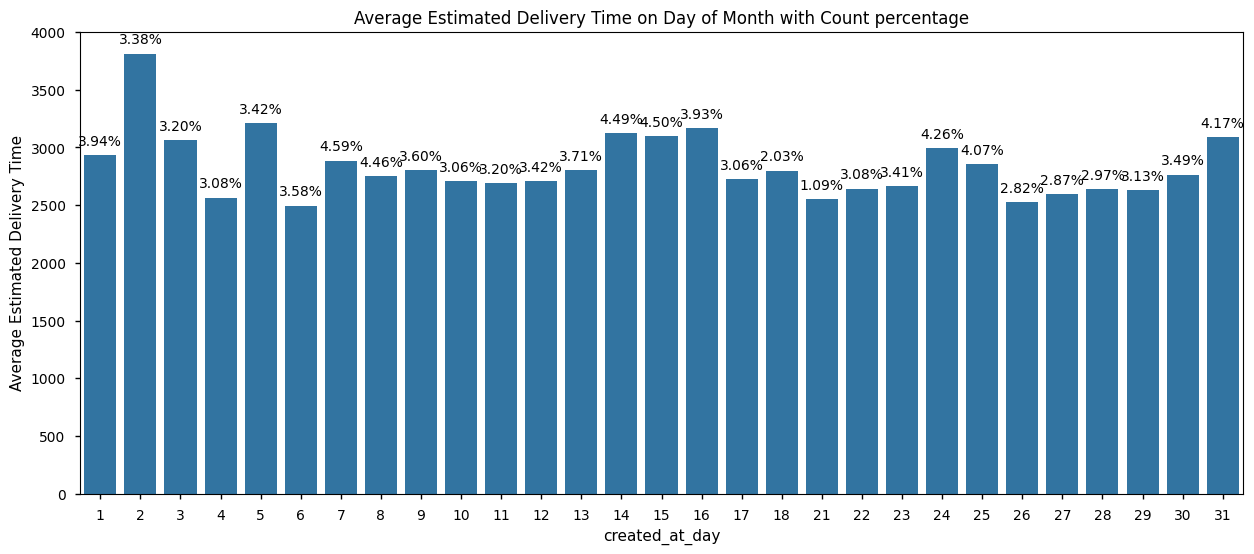

In [32]:
temp = pd.DataFrame({'created_at_day':df.created_at.dt.day, 'est_delivery_time':est_delivery_time})
temp = temp[temp.est_delivery_time < 60000].dropna()
temp1 = temp.groupby('created_at_day')['est_delivery_time'].mean()

plt.figure(figsize=(15,6))
ax = sns.barplot(x=temp1.index, y=temp1.values)

# Count of deliveries for each hour
delivery_count = temp['created_at_day'].value_counts().sort_index()
delivery_count = delivery_count*100/sum(delivery_count)
# Annotate bars with custom values
for i, p in enumerate(ax.patches):
    ax.annotate(f'{delivery_count.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_ylabel('Average Estimated Delivery Time')
plt.title('Average Estimated Delivery Time on Day of Month with Count percentage')
plt.show()

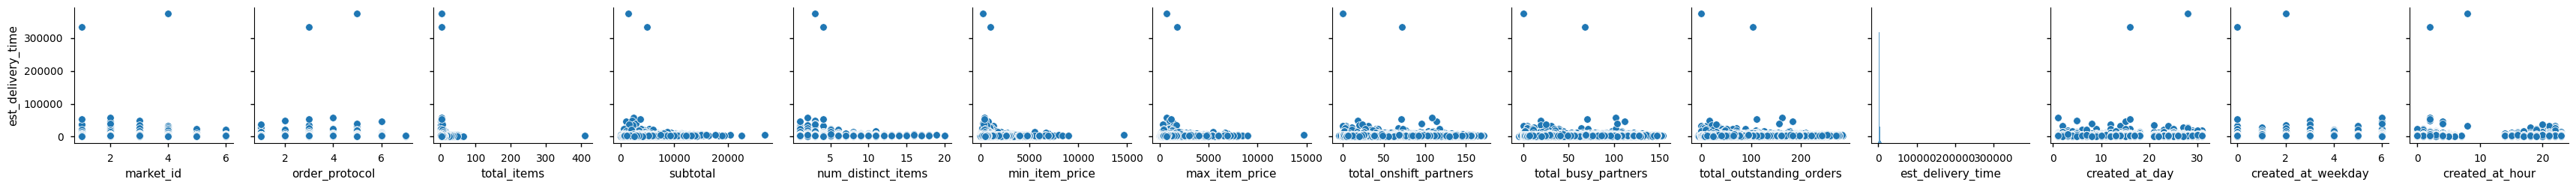

In [134]:
sns.pairplot(df, y_vars='est_delivery_time' )

<Axes: >

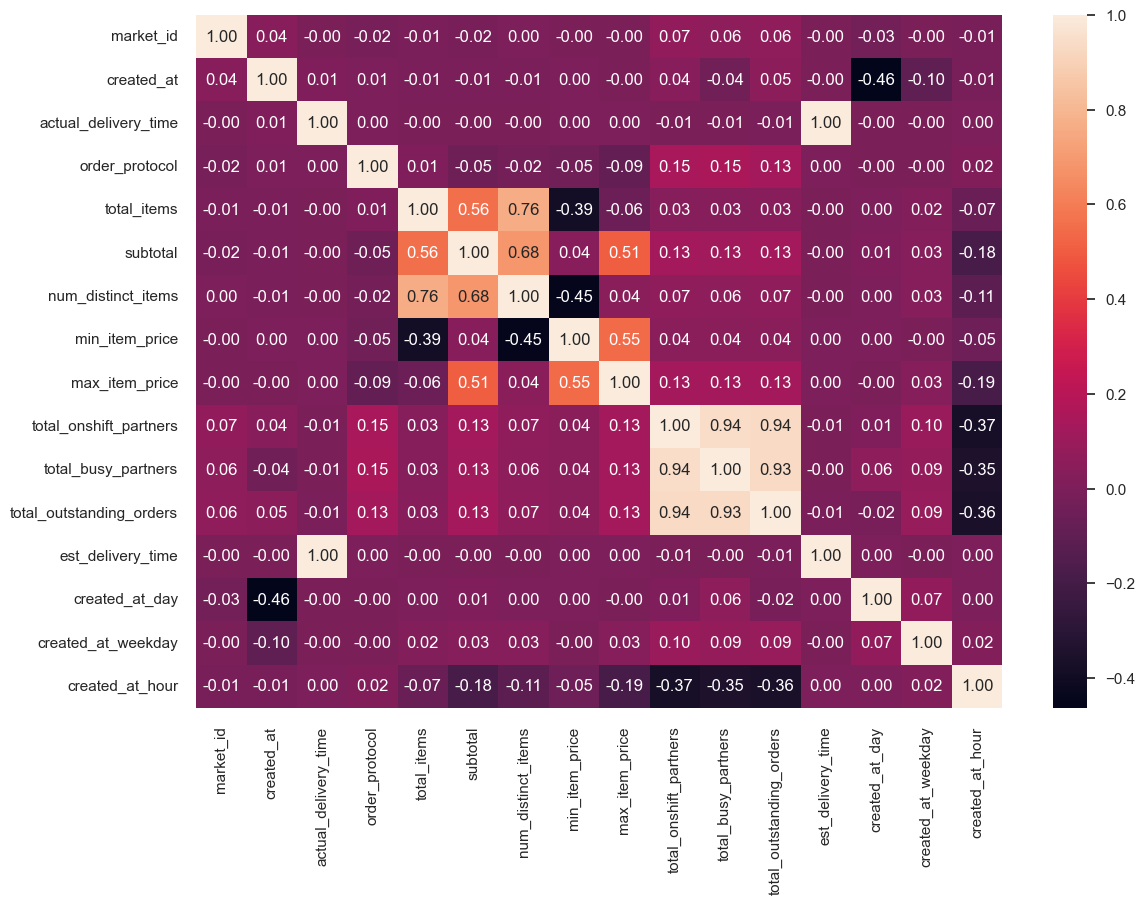

In [ ]:
sns.set(rc={'figure.figsize':(13,9)})
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, fmt=".2f")

<Axes: xlabel='est_delivery_time', ylabel='subtotal'>

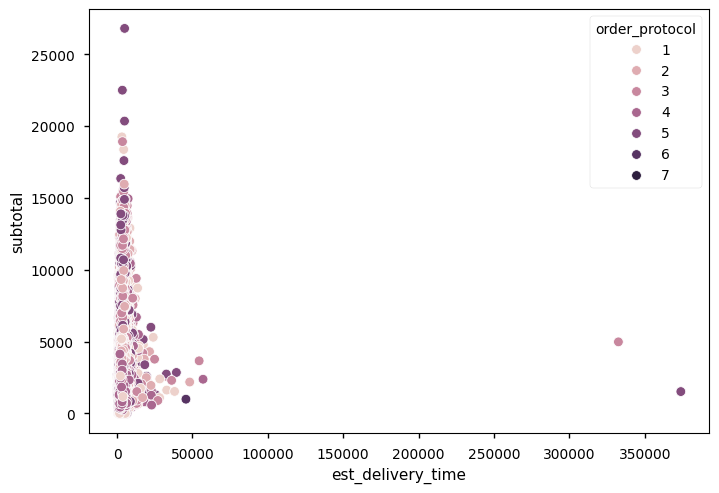

In [137]:
# Check for outliers
sns.scatterplot(x='est_delivery_time', y='subtotal', data=df.dropna(), hue='order_protocol')

In [41]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model = LocalOutlierFactor()

df['lof_anomaly_score'] = model.fit_predict(df.select_dtypes(exclude=['object', 'datetime']).dropna().values)

ValueError: Length of values (179783) does not match length of index (197428)

c:\Users\ashut\Downloads\notebooks\.venv\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ashut\Downloads\notebooks\.venv\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ashut\Downloads\notebooks\.venv\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ashut\Downloads\notebooks\.venv\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ashut\Downloads\notebooks\.venv

KeyboardInterrupt: 

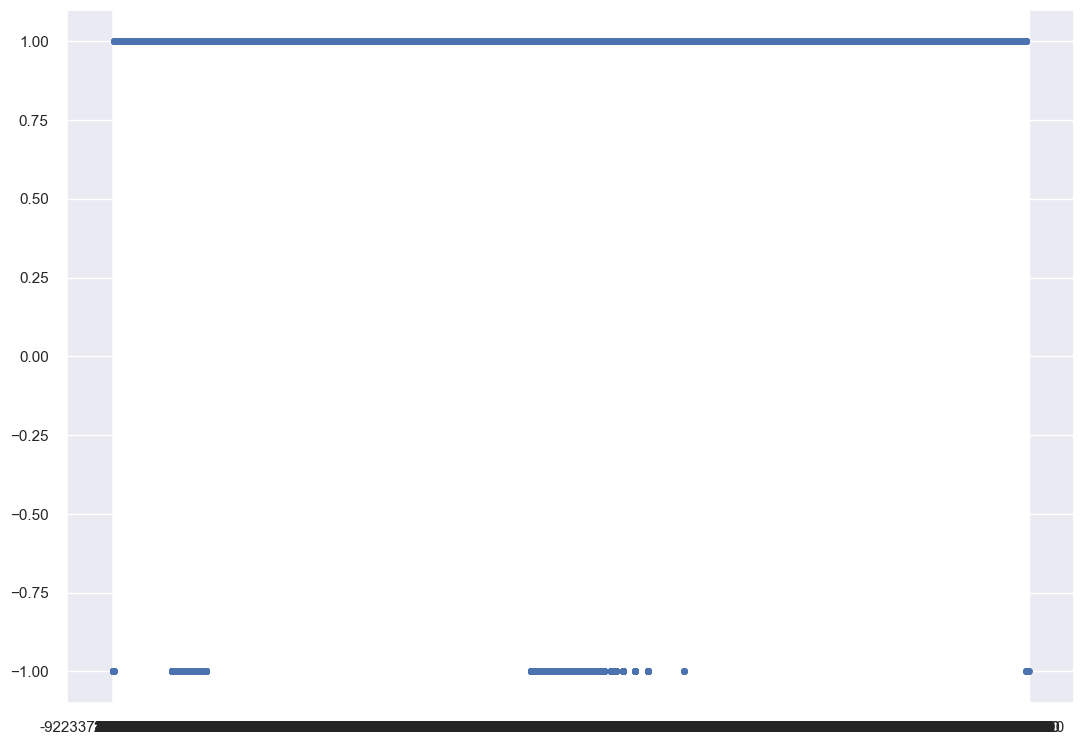

In [76]:
sns.scatterplot(df.dropna(), x='est_delivery_time', y='lof_anomaly_score')

In [71]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'est_delivery_time', 'created_at_day',
       'created_at_weekday', 'created_at_hour', 'lof_anomaly_score'],
      dtype='object')

# 3. Data Preprocessing and Feature Engineering <a class='anchor' id='feature_eng' ></a> [↑](#top)

In [13]:
porter.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [14]:
df = (porter
          .assign(
              est_delivery_time =(porter.actual_delivery_time - porter.created_at).astype('int64')/ (10**9),
              created_at_day=porter.created_at.dt.day,
              created_at_weekday=porter.created_at.dt.weekday,
              created_at_hour = porter.created_at.dt.hour,
              )
)

In [15]:
df['created_at_period'] =  pd.cut(df.created_at.dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=[1, 2, 3, 4],
       ordered=False,
       include_lowest=True)

In [16]:
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['created_at_period'] = pd.cut(df['created_at'].dt.hour, bins=bins, labels=labels)

In [17]:
df.iloc[170416]

market_id                                                5.0
created_at                               2015-02-01 01:36:33
actual_delivery_time                                     NaT
store_id                    6c7a107981f9c2a0ed55efce297bd1e2
store_primary_category                                  fast
order_protocol                                           4.0
total_items                                                3
subtotal                                                 982
num_distinct_items                                         3
min_item_price                                           165
max_item_price                                           575
total_onshift_partners                                  41.0
total_busy_partners                                     31.0
total_outstanding_orders                                31.0
est_delivery_time                         -9223372036.854776
created_at_day                                             1
created_at_weekday      

In [18]:
df.est_delivery_time.sort_values().head(20)

170416   -9.223372e+09
140635   -9.223372e+09
109      -9.223372e+09
115982   -9.223372e+09
7670     -9.223372e+09
158967   -9.223372e+09
78511    -9.223372e+09
63294     1.010000e+02
862       2.230000e+02
30562     2.970000e+02
42507     3.210000e+02
117928    3.250000e+02
135889    3.520000e+02
62781     3.860000e+02
158816    3.860000e+02
91844     4.060000e+02
84855     4.290000e+02
78374     4.700000e+02
101941    5.150000e+02
131899    5.160000e+02
Name: est_delivery_time, dtype: float64

In [19]:
df.est_delivery_time.sort_values().tail(20)

79473       23995.0
103937      24881.0
29715       25598.0
171404      27083.0
39989       28207.0
109875      28325.0
31185       32159.0
63505       32690.0
51228       32929.0
139989      36196.0
175971      38143.0
66787       38457.0
105825      39352.0
76743       45685.0
86952       48178.0
190860      54447.0
83055       57032.0
27189      332482.0
185550     373879.0
2690      8516859.0
Name: est_delivery_time, dtype: float64

In [20]:
df.loc[df.est_delivery_time<=0, 'est_delivery_time'] = pd.NA

In [21]:
df.loc[df.est_delivery_time > 60000 , 'est_delivery_time'] = df.est_delivery_time.median()

In [22]:
df.shape

(197428, 19)

In [23]:
df.est_delivery_time.sort_values().tail(20)

39989     28207.0
109875    28325.0
31185     32159.0
63505     32690.0
51228     32929.0
139989    36196.0
175971    38143.0
66787     38457.0
105825    39352.0
76743     45685.0
86952     48178.0
190860    54447.0
83055     57032.0
109           NaN
7670          NaN
78511         NaN
115982        NaN
140635        NaN
158967        NaN
170416        NaN
Name: est_delivery_time, dtype: float64

In [24]:
df = df.dropna(subset='est_delivery_time')

In [25]:
df.shape

(197421, 19)

In [26]:
print("Percentage of missing values")
np.round((df.isna().sum() / len(porter)) *100, 2)

Percentage of missing values


market_id                   0.50
created_at                  0.00
actual_delivery_time        0.00
store_id                    0.00
store_primary_category      2.41
order_protocol              0.50
total_items                 0.00
subtotal                    0.00
num_distinct_items          0.00
min_item_price              0.00
max_item_price              0.00
total_onshift_partners      8.24
total_busy_partners         8.24
total_outstanding_orders    8.24
est_delivery_time           0.00
created_at_day              0.00
created_at_weekday          0.00
created_at_hour             0.00
created_at_period           6.42
dtype: float64

In [27]:
porter.min_item_price.sort_values().head(20)

790      -86
187278   -52
170424   -51
46378    -48
46369    -35
77238    -31
104173   -30
91319    -13
182207   -13
119785    -9
119854    -7
165821    -6
1351      -1
153025     0
76443      0
79046      0
76444      0
165590     0
117034     0
165587     0
Name: min_item_price, dtype: int64

In [28]:
df.describe()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,est_delivery_time,created_at_day,created_at_weekday,created_at_hour
count,196434.000000,197421,197421,196426.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,181159.000000,181159.000000,181159.000000,197421.000000,197421.000000,197421.000000,197421.000000
mean,2.978700,2015-02-04 21:59:55.091540480,2015-02-04 22:48:23.348914176,2.882358,3.196367,2682.326379,2.670780,686.224596,1159.590444,44.806866,41.738787,58.047969,2861.579260,15.296929,3.218923,8.467362
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,101.000000,1.000000,0.000000,0.000000
25%,2.000000,2015-01-29 02:32:38,2015-01-29 03:22:29,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,2104.000000,7.000000,1.000000,2.000000
50%,3.000000,2015-02-05 03:29:06,2015-02-05 04:40:41,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,2660.000000,14.000000,3.000000,3.000000
75%,4.000000,2015-02-12 01:39:14,2015-02-12 02:25:26,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,3381.000000,24.000000,5.000000,19.000000
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,57032.000000,31.000000,6.000000,23.000000
std,1.524879,NaN,NaN,1.503775,2.666552,1823.106256,1.630261,522.044061,558.416236,34.525913,32.145163,52.660056,1164.078835,9.200990,2.045759,8.658781


In [29]:
df.describe(include='object')

,store_id,store_primary_category
count,197421,192661
unique,6743,74
top,d43ab110ab2489d6b9b2caa394bf920f,american
freq,937,19399


In [30]:
(df.total_onshift_partners.sort_values() < 0).sum()

21

In [31]:
(df.total_busy_partners.sort_values() < 0).sum()


21

In [32]:
(df.total_outstanding_orders.sort_values() < 0).sum()

44

In [33]:
df.nunique(dropna=False)

market_id                        7
created_at                  180981
actual_delivery_time        178110
store_id                      6743
store_primary_category          75
order_protocol                   8
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         173
total_busy_partners            160
total_outstanding_orders       282
est_delivery_time             7131
created_at_day                  30
created_at_weekday               7
created_at_hour                 19
created_at_period                5
dtype: int64

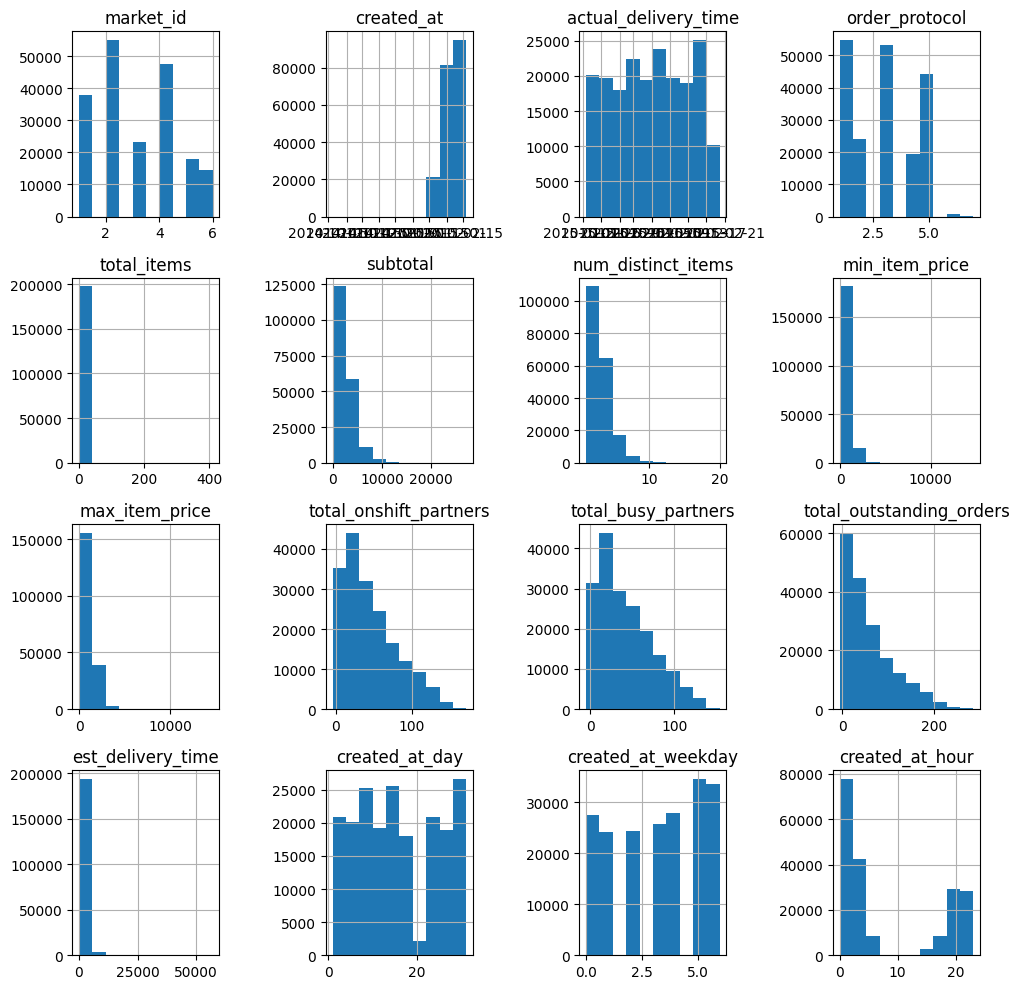

In [34]:
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

<Axes: >

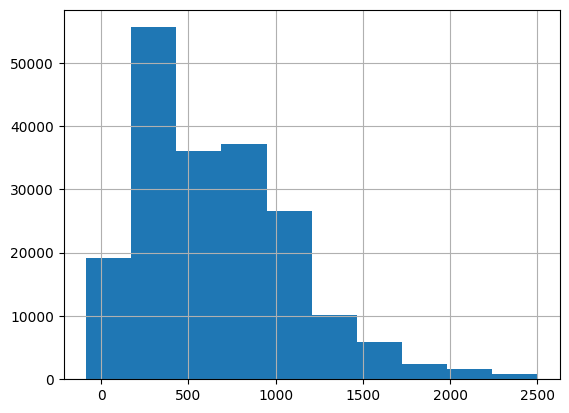

In [35]:
df[df.min_item_price < df.min_item_price.quantile(.99)].min_item_price.hist()

<Axes: >

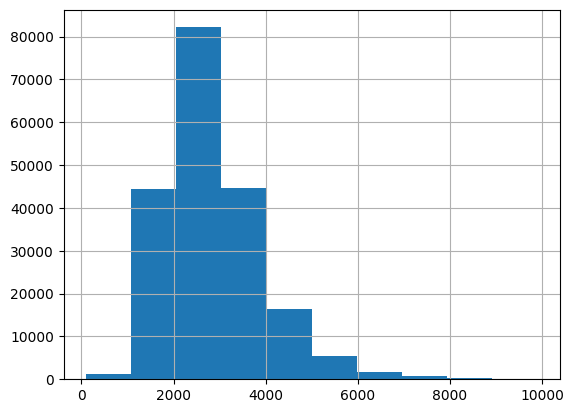

In [36]:
df[df.est_delivery_time < df.est_delivery_time.quantile(.999)].est_delivery_time.hist()

In [37]:
df.created_at = df.created_at.astype('int64') // 10**9

# The division by 10**9 is necessary because the timestamp is typically in nanoseconds, and dividing by 10**9 converts it to seconds.

In [38]:
df.actual_delivery_time = df.actual_delivery_time.astype('int64') // 10**9

In [39]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(df.select_dtypes(exclude=['object', 'category']).dropna())

In [40]:
(outlier_pred == -1).sum()

38813